## SML Assignment 1 
### Question 3 - Image Segmentation using Mean Shift CLustering

(384, 512, 3)


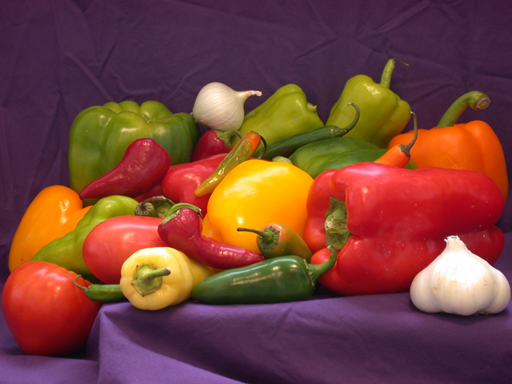

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Importing the Image class from PIL module
from PIL import Image
from matplotlib import image
# Opens a image in RGB mode
im = Image.open('peppers.png')
image_data = image.imread('peppers.png')
print(image_data.shape)

# Displaying the image
im

### Step 1
- Converting the image to a [R G B x y] matrix 

In [2]:
# Converting the image_date matrix to a Matrix with 5 features [R,G,B, X, Y]
# X and Y are the coordinates of the pixel
# R, G, B are the RGB values of the pixel
final_image_data = np.zeros((image_data.shape[0]*image_data.shape[1], 5))
for i in range(image_data.shape[0]):
    for j in range(image_data.shape[1]):
        final_image_data[i*image_data.shape[1]+j, 0] = image_data[i, j, 0]
        final_image_data[i*image_data.shape[1]+j, 1] = image_data[i, j, 1]
        final_image_data[i*image_data.shape[1]+j, 2] = image_data[i, j, 2]
        final_image_data[i*image_data.shape[1]+j, 3] = i
        final_image_data[i*image_data.shape[1]+j, 4] = j

print(final_image_data.shape)
print(final_image_data[3456])


(196608, 5)
[2.58823544e-01 1.37254909e-01 2.50980407e-01 6.00000000e+00
 3.84000000e+02]


### Step 2
- Normalise the value in each column by dividing by the maximum value of each column

In [3]:
# Normalising each column by dividing by the maximum value of that column
max_values = np.zeros((final_image_data.shape[1]))
for i in range(final_image_data.shape[1]):
    max_values[i] = final_image_data[:, i].max()
    final_image_data[:, i] = final_image_data[:, i]/final_image_data[:, i].max()

print(final_image_data[3456])

[0.25882354 0.13725491 0.25098041 0.0156658  0.75146771]


### Step 3 - 8
- Here we implement the mean shift algorithm to perform the image segmentation

In [4]:
# Implementing the Mean Shift Algorithm to Segment this Image
def mean_shift(data, bandwidth, tolerance = 0.1):
    
    # Labels is a numpy array which stores the cluster label for each point and is by default 0
    labels = np.zeros((final_image_data.shape[0]))
    no_of_samples = data.shape[0]

    # This is the label number which will be assigned to the next cluster
    label_number = 1

    # Step 3: Pick a random unlabelled data-point
    for i in range(no_of_samples):

        # If the point is already labelled, skip it
        if labels[i] != 0:
            continue

        # Step 4: Find all points within the bandwidth of the point
        # Step 5: Calculate the mean of all the points in the neighbourhood
        # Step 6: If the mean is within the tolerance, stop. Else, set the current point to the mean and repeat from step 4
        current_mean = data[i]
        max_iterations = 100
        for k in range(max_iterations):

            # Calculating the distance of all points from the current mean if the point is not labelled
            distances = np.zeros((no_of_samples))
            for j in range(no_of_samples):
                if labels[j] != 0:
                    distances[j] = np.inf
                else:
                    distances[j] = np.linalg.norm(current_mean - data[j])

            points_within_bandwidth = np.where(distances < bandwidth)[0]
            new_mean = np.mean(data[points_within_bandwidth], axis = 0)

            # Converging condition
            if np.linalg.norm(new_mean - current_mean) < tolerance:
                break

            # Updating the current mean
            current_mean = new_mean
            
        # Step 7: Assign all points within the bandwidth of the point to the same cluster
        labels[points_within_bandwidth] = label_number
        label_number += 1
    
    # Step 8: Repeat from step 3 until all points are labelled
    return labels

# Calling the mean_shift function         
labels = mean_shift(final_image_data, 0.2)

# Labeling the points which are not in any cluster as a new cluster
for i in range(len(labels)):
    if(labels[i] == 0):
        labels[i] = labels.max() + 1

print(labels.shape)
print("Clusters are Ready!")
print("The total number of unique clusters formed are: ", labels.max())

(196608,)
Clusters are Ready!
The total number of unique clusters formed are:  192.0


### Assigning Colours to the Clusters
- In these steps we assign colours to the clusters formed after applying the Mean Shift Algorithm

In [5]:
# Plotting the segmented image using the labels

# This segmented image array will contain the same RGB value for any cluster based on the value of its centroid
segmented_image = np.zeros((image_data.shape[0], image_data.shape[1], 3))

# The following numpy array is a 192 x 3 matrix which stores the RGB values of each cluster
a = len(set(labels))
dict_colours = np.zeros((a, 3))

# The following loop assigns a RGB value to each cluster of the first point in that cluster from the original image
for i in range(image_data.shape[0]):
    for j in range(image_data.shape[1]):
        if(dict_colours[int(labels[i*image_data.shape[1]+j]) - 1, 0] == 0 and dict_colours[int(labels[i*image_data.shape[1]+j]) - 1, 1] == 0 and dict_colours[int(labels[i*image_data.shape[1]+j]) - 1, 2] == 0):
            dict_colours[int(labels[i*image_data.shape[1]+j]) - 1, 0] = image_data[i, j, 0]
            dict_colours[int(labels[i*image_data.shape[1]+j]) - 1, 1] = image_data[i, j, 1]
            dict_colours[int(labels[i*image_data.shape[1]+j]) - 1, 2] = image_data[i, j, 2]


In [6]:
# The following loop uses dict_colours to assign the RGB values to the segmented_image array
for i in range(image_data.shape[0]):
    for j in range(image_data.shape[1]):
        segmented_image[i, j, 0] = dict_colours[int(labels[i*image_data.shape[1]+j]) - 1, 0]
        segmented_image[i, j, 1] = dict_colours[int(labels[i*image_data.shape[1]+j]) - 1, 1]
        segmented_image[i, j, 2] = dict_colours[int(labels[i*image_data.shape[1]+j]) - 1, 2]

print(segmented_image.shape)

(384, 512, 3)


### Plotting the Segmented Image

The Segmented Image is:


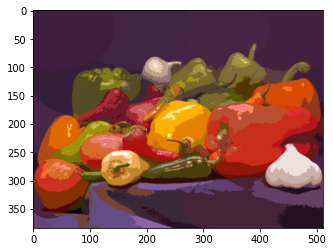

The Original Image is:


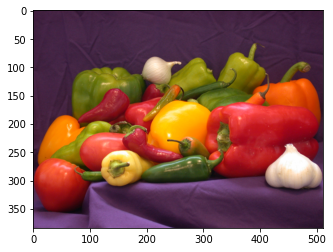

In [9]:
# Plotting the Segmented Image
plt.imshow(segmented_image)
print("The Segmented Image is:")
plt.show()

# Plotting the Original Image
plt.imshow(image_data)
print("The Original Image is:")
plt.show()
